In [1]:
from dist_tools import *

%matplotlib inline

In [2]:
metrics = pd.DataFrame()

for year, sessn in [[1990, 107], [2000, 111], [2010, 114]]:
    for usps in us_states:

        epsg, fips, seats = get_state_info(usps)
        if seats == 1: continue

        print(usps, year, sessn, seats, epsg, fips)

        cd_gdf = get_state_cd_map(usps, sessn, year, epsg)
        tr_gdf = get_state_cells(usps, year, epsg, cell = "tract")
        evaluate_spatial(cd_gdf, tr_gdf)
        metrics = metrics.append(cd_gdf.to_crs(epsg = 2163))
        
metrics = metrics.reset_index()

cols = ['usps', 'congress', 'year', 'cd', 
        'R_isoa', 'R_isop', 'R_LIC', 'R_SCC', 'R_mean', 'R_harm', 'R_dyn',
        'pop_hull', 'A_hull', 'IP_d', 
        'obj_ip_dist', 'obj_polsby', 'obj_lic', 'obj_scc', 'obj_inertia_a', 'obj_inertia_p', 
        'obj_mean_radius', 'obj_harm_radius', 'obj_dyn_radius', 'obj_axis', 'obj_exchange', 
        'obj_hull_pop', 'obj_hull_area', 'obj_rohrbach']

metrics[cols + ['geometry']].to_file("decennial_compactness.shp")
metrics[cols].to_csv("decennial_compactness.csv", index = False)

al 1990 107 7 3465 1
az 1990 107 9 3478 4
ar 1990 107 4 3484 5
ca 1990 107 53 3488 6
co 1990 107 7 3501 8
ct 1990 107 5 3507 9
fl 1990 107 27 3513 12
ga 1990 107 14 3518 13
hi 1990 107 2 2782 15
id 1990 107 2 3522 16
il 1990 107 18 3528 17
in 1990 107 9 3532 18
ia 1990 107 4 3536 19
ks 1990 107 4 3540 20
ky 1990 107 6 3546 21
la 1990 107 6 3552 22
me 1990 107 2 3554 23
md 1990 107 8 3559 24
ma 1990 107 9 3585 25
mi 1990 107 14 3587 26
mn 1990 107 8 3594 27
ms 1990 107 4 3597 28
mo 1990 107 8 3601 29
ne 1990 107 3 3606 31
nv 1990 107 4 3607 32
nh 1990 107 2 3613 33
nj 1990 107 12 3615 34
nm 1990 107 3 3617 35
ny 1990 107 27 3623 36
nc 1990 107 13 3631 37
oh 1990 107 16 3637 39
ok 1990 107 5 3639 40
or 1990 107 5 3643 41
pa 1990 107 18 3364 42
ri 1990 107 2 3653 44
sc 1990 107 7 3655 45
tn 1990 107 9 3661 47
tx 1990 107 36 3665 48
ut 1990 107 4 3675 49
va 1990 107 11 3687 51
wa 1990 107 10 3689 53
wv 1990 107 3 3694 54
wi 1990 107 8 3695 55
al 2000 111 7 3465 1
az 2000 111 9 3478 4
ar 20

In [3]:
metrics = gpd.read_file("decennial_compactness.shp")[["usps", "congress", "cd", "geometry"]].copy()
metrics = metrics.merge(pd.read_csv("decennial_compactness.csv"))
metrics.filter(regex = "obj", axis = 1).columns

Index(['obj_ip_dist', 'obj_polsby', 'obj_lic', 'obj_scc', 'obj_inertia_a',
       'obj_inertia_p', 'obj_mean_radius', 'obj_harm_radius', 'obj_dyn_radius',
       'obj_axis', 'obj_exchange', 'obj_hull_pop', 'obj_hull_area',
       'obj_rohrbach'],
      dtype='object')

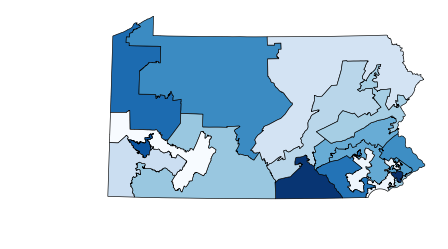

In [4]:
pa2010 = metrics[(metrics.usps == 'PA') & (metrics.year == 2010)].to_crs(epsg = 3364)
pa2010.plot(column = "obj_hull_pop", figsize = (3, 3), cmap = "Blues", edgecolor = "k").set_axis_off()

### Test out a few of the trickier ones...

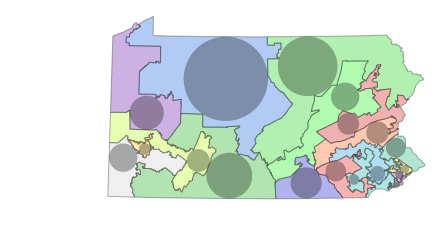

In [5]:
usps = "pa"
epsg, fips, seats = get_state_info(usps)
cd_gdf = get_state_cd_map(usps, 114, 2010, epsg)
ax = cd_gdf.plot(cmap = "nipy_spectral", alpha = 0.3, linewidth = 0.5, edgecolor = "k", figsize = (3, 3))
# tr_gdf.plot(color = "red", markersize = 1, ax = ax)
# tr_gdf.set_geometry("ctr").plot(color = "green", markersize = 5, ax = ax)
# tr_gdf.set_geometry("pctr").plot(color = "blue", markersize = 5, ax = ax)
cd_gdf.geometry.apply(get_lic_circ).plot(ax = ax, color = "k", alpha = 0.3)
# cd_gdf.geometry.apply(get_exchange_area).plot(ax = ax, color = "grey", linewidth = 1.2, alpha = 0.4)

# cd_gdf.convex_hull.intersection(state_mp).plot(ax = ax)
# tr_gdf.set_geometry("shape").plot(column = "dperim", linewidth = 0, cmap = "RdBu", alpha = 1, ax = ax)
# cd_gdf.boundary.plot(ax = ax, color = "white")
ax.set_axis_off()